<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Произведем-необходимые-импорты" data-toc-modified-id="Произведем-необходимые-импорты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Произведем необходимые импорты</a></span></li><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучим данные</a></span></li><li><span><a href="#Посмотрим-на-графики-распределений-данных" data-toc-modified-id="Посмотрим-на-графики-распределений-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посмотрим на графики распределений данных</a></span></li><li><span><a href="#Приступим-к-исследованию-гипотез" data-toc-modified-id="Приступим-к-исследованию-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Приступим к исследованию гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза №2</a></span></li></ul></li><li><span><a href="#Подведем-итоги" data-toc-modified-id="Подведем-итоги-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подведем итоги</a></span></li></ul></div>

## Произведем необходимые импорты

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



## Изучим данные

Изучим данные. Прочитаем их из csv файла в переменную `data`

In [3]:
data = pd.read_csv('data_csv.csv',encoding='utf-8',sep=';')

In [4]:
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [24]:
data.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Пропусков нет. Каждый признак имеет тот тип данных, который и должен быть у этого признака:

Количество дней - целое число

Возраст - целое число

Пол - объект

## Посмотрим на графики распределений данных

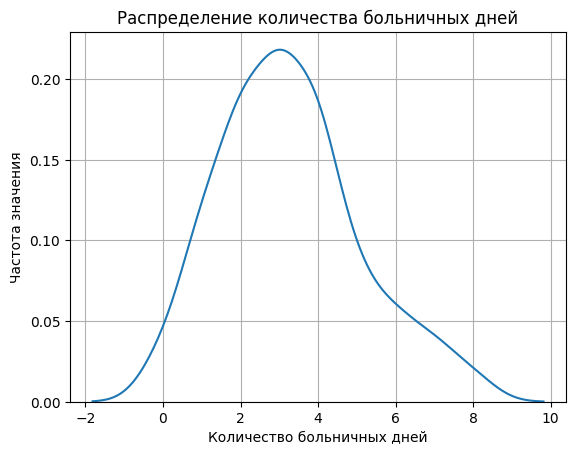

In [21]:
sns.kdeplot(data,x='Количество больничных дней',);
plt.grid(True);
plt.title('Распределение количества больничных дней');
plt.ylabel('Частота значения');

Как мы видим, график небольшое сходство с нормальным распределением. Среднее значение равно 3, Максмимальное равно 8, минимальное равно 9

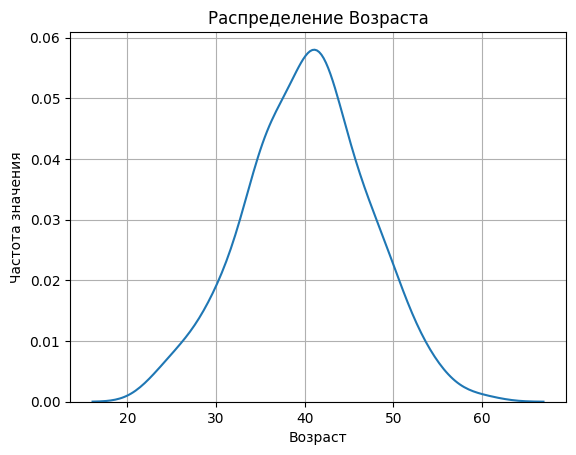

In [22]:
sns.kdeplot(data,x='Возраст');
plt.grid(True);
plt.title('Распределение Возраста');
plt.ylabel('Частота значения');

На данном графике мы видим, что распределение похоже на нормальное распределение, среднее равно примерно 40 лет. минимальное около 23, максимальное около 60.

## Приступим к исследованию гипотез

### Гипотеза №1

Гипотеза:

Мужчины пропускают в течение года более 2 рабочих дней (work_days) по
болезни значимо чаще женщин.




<!-- Сначала план был проверить гипотезу с помощью двойного ttest'а, но на самом деле лучше посчитать количесво -->

Критерий независимости хи-квадрат Пирсона. Проверим наличие ссвязи между болезненностью сотрудника и его полом

Установим уровень статистической значимости а=0.05

In [32]:
data_c = data.copy(deep=True)

In [33]:
data_c['target'] = (data_c['Количество больничных дней']>2)

In [36]:
data_c['target'] = data_c['target'].astype(int)

In [38]:
data_c['Пол'] = data_c['Пол'].replace('М',1).replace('Ж',0)

In [39]:
data_c

,Количество больничных дней,Возраст,Пол,target
0,5,39,0,1
1,4,54,1,1
2,4,26,1,1
3,5,42,1,1
4,4,29,1,1
...,...,...,...,...
232,5,30,1,1
233,4,36,0,1
234,2,60,0,0
235,2,44,0,0


Построим таблицу сопряженности

In [40]:
t = data_c.groupby('Пол')['target'].value_counts().unstack()

In [51]:
t

target,0,1
Пол,,
0,31,67
1,55,84


Теперь рассчитаем суммарное количество "здоровых"(пропускают не более 2 дней) и болеющих(пропускают более 2 дней)

In [72]:
t[0]

Пол
0    31
1    55
Name: 0, dtype: int64

In [ ]:
n_0 = t[0].sum()
n_1 = t[1].sum()
n_sum = n_0+n_1

Рассчитаем доли

In [48]:
p_0 = n_0 / n_sum
p_1 = n_1 / n_sum

Посчитаем количество мужчин и женщин

In [49]:
n_w = t.iloc[0].sum()
n_m = t.iloc[1].sum()


Посчитаем ожидаемы частоты мужчин и женщин по классам

In [52]:
w_0 = n_w*p_0 
w_1 = n_w*p_1 
m_0 = n_m*p_0 
m_1 = n_m*p_1 

In [55]:
print('w_0',w_0)
print('w_1',w_1)
print('m_0',m_0)
print('m_1',m_1)

w_0 35.561181434599156
w_1 62.438818565400844
m_0 50.438818565400844
m_1 88.56118143459915


In [53]:
st.chi2_contingency(t, correction=False)

Chi2ContingencyResult(statistic=1.5656095414907927, pvalue=0.21084576203875743, dof=1, expected_freq=array([[35.56118143, 62.43881857],
       [50.43881857, 88.56118143]]))

In [70]:
print('pvalue равно',st.chi2_contingency(t, correction=False).pvalue)

pvalue равно 0.21084576203875743


pvalue равно 0.211, значит, что при нашем уровне статистической значимости 0.05, гипотеза не отвергается, то есть мы не можем утверждать, что количество пропусков зависит от пола.

### Гипотеза №2

Проделаем похожие действия, теперь проверим, зависит ли болезненность сотрудников от возраста.

Нулевая гипотеза:

Работники старше 35 лет (age) пропускают в течение года более 2 рабочих
дней (work_days) по болезни значимо чаще своих более молодых коллег.

Установим уровень статистической значимости а=0.05

In [59]:
data_c_2 = data.copy(deep=True)

In [60]:
data_c_2['target'] = (data_c_2['Количество больничных дней']>2)

In [61]:
data_c_2['target'] = data_c_2['target'].astype(int)

In [62]:
data_c_2['Возраст'] = data_c_2['Возраст'].where(data_c_2['Возраст'] > 35, 1).where(data_c_2['Возраст'] <= 35, 0)

1 - Старше 35

0 - младше 35

In [63]:
data_c_2

,Количество больничных дней,Возраст,Пол,target
0,5,0,Ж,1
1,4,0,М,1
2,4,1,М,1
3,5,0,М,1
4,4,1,М,1
...,...,...,...,...
232,5,1,М,1
233,4,0,Ж,1
234,2,0,Ж,0
235,2,0,Ж,0


Построим таблицу сопряженности

In [66]:
t_2 = data_c_2.groupby('Возраст')['target'].value_counts().unstack()

In [67]:
t_2

target,0,1
Возраст,,
0,65,115
1,21,36


In [68]:
st.chi2_contingency(t_2, correction=False)

Chi2ContingencyResult(statistic=0.010005714656269607, pvalue=0.9203216442446261, dof=1, expected_freq=array([[ 65.3164557, 114.6835443],
       [ 20.6835443,  36.3164557]]))

In [71]:
print('pvalue равно',st.chi2_contingency(t_2, correction=False).pvalue)

pvalue равно 0.9203216442446261


pvalue равно 0.920, значит, что при нашем уровне статистической значимости 0.05, гипотеза не отвергается, то есть мы **не** можем утверждать, что количество пропусков зависит от возраста.

## Подведем итоги

Произвели импорт всех данных, изучили данных.

Далее произвели исследование двух гипотез, результат обеих гипотез показал, что мы не можем отвергнуть нулевые гипотезы, что значит, что нам нужно точнее подойти к вопросу исследования, чтобы получить ответы на наши вопросы.